# Classificação Multiclasse

Vamos usar o dataset mais clássico da história do Machine Learning: o dataset Iris. Ele contém medidas de 150 flores de 3 espécies diferentes de Íris (Setosa, Versicolor e Virginica). Nosso objetivo é treinar um modelo para identificar a espécie de uma flor com base nas medidas de suas pétalas e sépalas.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris # O dataset já vem com o Scikit-learn!
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Carregando os dados
iris = load_iris()
# Criando um DataFrame para facilitar a exploração
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target # O target é numérico: 0, 1, 2

# Mapeando os números para os nomes das espécies para clareza
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df_iris['species_name'] = df_iris['species'].map(species_map)

print("--- Amostra do Dataset Iris ---")
print(df_iris.sample(5))

# 2. Separando Features e Target
X = df_iris[iris.feature_names]
y = df_iris['species']

# 3. Divisão em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Treinando o modelo
modelo_iris = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_iris.fit(X_train, y_train)

# 5. Fazendo previsões nos dados de teste
previsoes = modelo_iris.predict(X_test)

# 6. Avaliando os resultados
print("\n--- Resultados da Classificação Multiclasse ---")
print(f"Acurácia do modelo: {accuracy_score(y_test, previsoes) * 100:.2f}%")
print("\nRelatório de Classificação Detalhado:")
print(classification_report(y_test, previsoes, target_names=iris.target_names))


--- Amostra do Dataset Iris ---
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
126                6.2               2.8                4.8               1.8   
9                  4.9               3.1                1.5               0.1   
116                6.5               3.0                5.5               1.8   
52                 6.9               3.1                4.9               1.5   
137                6.4               3.1                5.5               1.8   

     species species_name  
126        2    Virginica  
9          0       Setosa  
116        2    Virginica  
52         1   Versicolor  
137        2    Virginica  

--- Resultados da Classificação Multiclasse ---
Acurácia do modelo: 88.89%

Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73  

Para ver essa "confusão" de forma explícita,<br>
usamos a Matriz de Confusão, que agora será uma matriz 3x3.


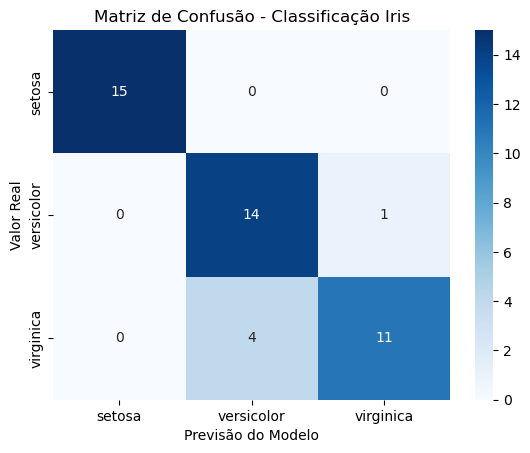

In [3]:
# Gerando e visualizando a Matriz de Confusão
cm = confusion_matrix(y_test, previsoes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

plt.title('Matriz de Confusão - Classificação Iris')
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.show()
